# Starting with Pytorch

This is the first of the series of Pytorch tutorials that you will see over last two week of the Machine Learning module. This tutorial covers installation and/or using Google Colab, Pytorch tensors, Autograd and your first neural network based on a single artificial neuron.

## Set up your Pytorch environment

Pytorch is a popular environment for implementing and training deep neural network models. You can install Pytorch on your own computer, or you can run your notebooks on Google Colab instead. This week's tutorial will run fine on your laptop, but next week we will need GPU, and Google Colab will be therefore needed.

### Install Pytorch locally
You can install Pytorch locally by visiting 

https://pytorch.org/get-started/locally/

Run the command from this website for example in your Anaconda Prompt. You do not need a GPU to run the Pytorch on your own computer. By default, the Pytorch runs on CPU. Examples in this notebook are simple and do not require GPU. 

Next week you will need also GPU, and for that you need to have NVIDIA GPU card and install CUDA. This can be tricky, so we do not provide instructions and refer you to Colab instead.

### Use Google Colab
Follow these instructions:
1. Go to https://colab.research.google.com/
2. Click __Upload__
3. Upload this notebook

You are now ready to start working in Colab. Next week we will also show how to use GPU in Colab.

### Import Pytorch

Check that Pytorch is available in your environment by importing it:

In [1]:
import torch

## Pytorch tensors
Pytorch tensors are similar to `numpy` arrays, but have some additional features, including the ability to run on GPU and features to enable automatic differentiation. 

We can create a random Pytorch tensor by

In [2]:
tensor = torch.rand(2, 2, 2)
print(tensor)

tensor([[[0.8552, 0.6969],
         [0.5578, 0.2319]],

        [[0.7479, 0.9332],
         [0.0487, 0.0488]]])


or by setting predefined values

In [3]:
tensor2 = torch.tensor([1,2])
print(tensor2)

tensor([1, 2])


We can access individual elements of tensors and their shape similarly to numpy arrays:

In [4]:
print(tensor[0,0,0])
print(tensor.shape)

tensor(0.8552)
torch.Size([2, 2, 2])


We can reshape the tensors using `view` without copying the data

In [5]:
print(tensor.view(2,4))

tensor([[0.8552, 0.6969, 0.5578, 0.2319],
        [0.7479, 0.9332, 0.0487, 0.0488]])


We can easily convert between numpy arrays and tensors:

In [6]:
import numpy as np
a = np.array([1,2,3])
t = torch.from_numpy(a)
print(t)

tensor([1, 2, 3], dtype=torch.int32)


In [7]:
a2 = t.numpy()
print(a)

[1 2 3]


**Activity 1:** Practise  working  with  Pytorch  tensors.   First,  create  and  display  a Pytorch tensor:
* Create a numpy array with values `[1,...,12]` (*Hint:* You can use `np.linspace`). 
* Convert it to a pytorch tensor.
* Print out the tensor as a matrix of size $3\times 4$

In [8]:
import numpy as np
import torch 

# Create a numpy array
x = np.linspace(1,12,12)

# Convert to tensor
t = torch.from_numpy(x)

# Display in shape 3x4
print(t.view(3,4))

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)


**Activity 2:** Learn how to concatenate two Pytorch tensors
* Create two random Pytorch tensors with sizes $1 \times 2 \times 4 \times 4$ and $1 \times 5 \times 4 \times 4$ 
* Concatenate them on the 1st axis using `torch.cat`(*Hint:* axis are numbered from 0)
* Print the dimensions of the concatenated tensor

In [9]:
# Create two random torch arrays
a = torch.randn(1, 2, 4, 4)  
b = torch.randn(1, 5, 4, 4)  

# Concatenate
c = torch.cat([a, b], dim=1) 

# Print shape
print('c.shape: ', c.shape)

c.shape:  torch.Size([1, 7, 4, 4])


## Autograd

Pytorch offers automatic differentiation to enable training of neural networks. If the tensor stores parameters that we want to learn, we can set the `tensor` atrribute `requires_grad` to `True`.

In [10]:
w = torch.tensor([1.0,2.0], requires_grad=True)

Let's minimise the sum of squared error loss with respect to `w` implemented as

In [11]:
s=w**2
loss=s.sum() 

Note that Pytorch created functions to calculate the derivatives of each tensor with respect to `w`

In [12]:
print(s)
print(loss)

tensor([1., 4.], grad_fn=<PowBackward0>)
tensor(5., grad_fn=<SumBackward0>)


The derivatives are calculated by chain rule, or in other words by **backpropagation** from the variable `loss` trhough internmediate steps (variable `s`) towards the parameters `w`. This is implemented using function `backward`. The gradients can be accessed through `w.grad`.

*Note: if you run `backward` twice, Pytorch will complain, re-run the cells above to fix this*

In [13]:
loss.backward()
print(w.grad)

tensor([2., 4.])


**Activity 3:** Practise using the Autograd feature of Pytorch:
* Create a Pytorch tensor `y` with values `[0,1]`
* Create another Pytorch tensor `p` with values `[0.5,0.5]`. Set `requires_gradient` to `True`.
* Implement cross-entropy loss $L=-y_0\log(p_0)-y_1\log(p_1)$
* Print out the loss value
* Calculate the gradients of the loss with respect to `p` and print them out.

In [14]:
# Create tensor y = [0,1]
y=torch.tensor([0,1])
# Create tensor p=[0.5.0.5], requires grad
p=torch.tensor([0.5,0.5],requires_grad=True)

# Calculate cross-entropy loss
m = y*torch.log(p)
ce_loss = -torch.sum(m)
# Print loss value
print(ce_loss)

# Calculate gradients w.r.t. p
ce_loss.backward()
# Print gradients w.r.t. p
p.grad

tensor(0.6931, grad_fn=<NegBackward>)


tensor([-0., -2.])

## The first neural network in Pytorch

<img src="images/SLP_cropped.png" width = "400" style="float: right;"> 
The simplest neural network consists of a single artificial neuron. It can be expressed by equation
$$z=\sum_{j=0}^Dw_jx_j$$
$$\hat{y}=f(z)$$
where $x_j$ are input features, $\hat{y}$ are outputs, $w_j$ are learnable weights and $f$ is an activation function. If we choose **mean squared error** as the loss to be minimised and **identity** as an activation function, we will obtain a simple multivariate **linear regression** with $D$ input features $\hat{y}=\sum_{j=0}^Dw_jx_j$.

In Pytorch the equation $z=\sum_{j=0}^Dw_jx_j$ is implemented as a **linear layer** with $D$ inputs and $1$ output:

In [15]:
import torch.nn as nn

D=3
nn.Linear(D,1)

Linear(in_features=3, out_features=1, bias=True)

**Activity 4:** Play with parameters of the linear layer to see how it changes.

### Create a neural network model
To create a neural network model in Pytorch we need to define its architecture in a new class inherited from `torch.nn.Module`.
To do that we need to define functions `__init__` and `forward`:

1. The function `__init__` is a constructor in which we define the layers and any parameters we need. We must always define the function `super` inside it to initialize the parent class.
2. The function `forward` defines the forward pass, which calculates the output $\hat{y}$ from the input features $x_j$.

Note, that we do not need to define the backward pass, this will be automatically created by Pytorch.

The network architecture for a **univariate linear regression** model will consist of a **single linear layer** with $D=1$ input features and $1$ output. Our new single artificial neuron regressor `ANRegressor` is defined below: 

In [16]:
class ANRegressor(nn.Module):
    def __init__(self):
        super(ANRegressor, self).__init__()
        self.layer = nn.Linear(1, 1)

    def forward(self, x):
        x = self.layer(x)      
        return x

Next, we need to create an instance of this model which we will call `net`

In [17]:
net = ANRegressor()
print(net)

ANRegressor(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


We see that we have one linear layer with 1 input and 1 output feature, and the bias is set to `True`. We therefore obtained the univariate linear model $$y=wx+b$$
We can also print out the learnable parameters of this model `net.parameters()` - we see that there are two:

In [18]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[0.8313]], requires_grad=True)
Parameter containing:
tensor([-0.8138], requires_grad=True)


**Activity 5:** Change the number of input features in the `ANRegressor`. How many parameters to optimise you get now? Make sure that you change it back to 1 before you continue with the tutorial.

**Answer:** Number of input features + 1.

### The loss and the optimiser

To fit this model to the training data we need to create the **loss** function `loss_function`. Because we are creating a regression we will use **mean squared error** (MSE)
$$L(\mathbf{y},\mathbf{\hat{y}})=\sum_{i=1}^N(y_i-\hat{y_i})^2$$
where $y$ are the true target values and $\hat{y_i}$ are the predicted target values.

In [19]:
loss_function = nn.MSELoss()

We select the stochastic gradient descent optimiser with learning rate $\eta=0.2$. Note that the learnable parameters of the network `net` are the first input argument of the optimiser. 

In [20]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

### Training data

We will revisit example of predicting brain volumes from the age of the baby that we have seen in Week 2 of this module. Note that after loading the data, we need to 
* reshape the data to size N x 1 where N is the number of samples and 1 is the number of input (for `X`) or output (for `y`) features.
* convert our input and output values to the Pytorch tensors
* Convert out data into `float` values, which are required by Pytorch functions
Note that we can plot the Pytorch tensors just like numpy arrays, as long as they do not require gradients.

If working on Google colab, you first need to upload the dataset. To do that run the code below and the upload fine `'neonatal_brain_volumes.csv'` that you downloaded from KEATS.

In [21]:
# only do this if you work on Google Colab
# run the cell
# then upload file 'neonatal_brain_volumes.csv'

# from google.colab import files
# files.upload()

Run the cell to load, convert and plot the data.

X:  torch.Size([162, 1])
y:  torch.Size([162, 1])


Text(0, 0.5, 'brain volume [mL]')

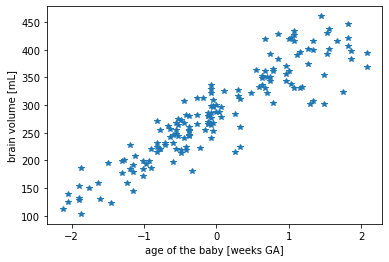

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load
data = pd.read_csv('neonatal_brain_volumes.csv').to_numpy()

# standardise and reshape
X = StandardScaler().fit_transform(data[:,0].reshape(-1,1))
y = data[:,1].reshape(-1,1)

# convert
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
print('X: ', X.shape)
print('y: ', y.shape)

# plot
plt.plot(X, y,'*')
plt.xlabel('age of the baby [weeks GA]')
plt.ylabel('brain volume [mL]')

### Training  the neural network
The network is trained in a number of **epochs**. Each epoch consists of the following steps 

1. Clear gradients
2. Forward pass: predict outputs $\hat{y_i}$ for current estimate of network parameters $w_j^{(n)}$
3. Compute loss $L(\mathbf{y},\mathbf{\hat{y}})$ between predicted and true outputs
4. Backward pass: calculate gradients (derivatives) $\frac{\partial L(\mathbf{w}^{(n)})}{\partial w_j^{(n)}} $ of the loss with respect to the network parameters
5. Update the network parameters $w_j^{(n+1)}=w_j^{(n)}-\eta \frac{\partial L(\mathbf{w}^{(n)})}{\partial w_j^{(n)}}   $

During training we iterate through our data. Each iteration $n$ is called an **epoch**. During each epoch we run these 5 steps. The optimal number of the epochs depends on the dataset, the task and the learning rate. 

*Note: if you want to rerun this cell, you need to also rerun the cells above starting from the creating the network, because it remembers the fitted parameters.*

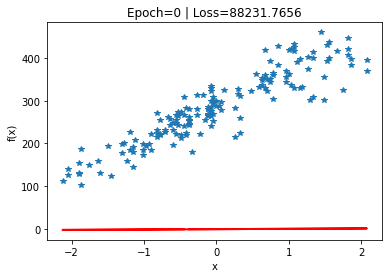

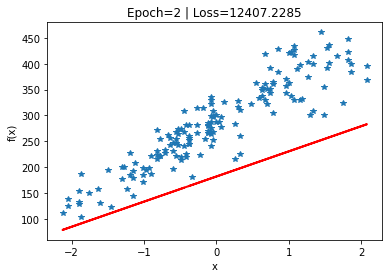

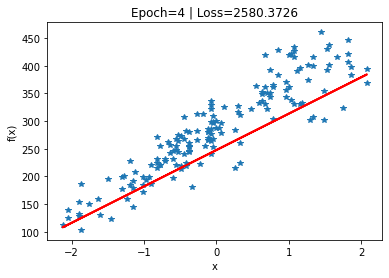

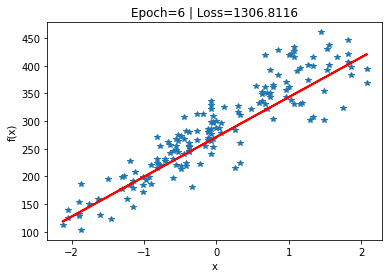

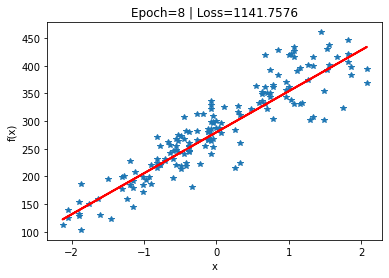

In [23]:
epochs = 10
for i in range(epochs):
    
    # 1. Clear gradients 
    optimizer.zero_grad() 
    # 2. Forward pass
    prediction = net(X) 
    # 3. Compute loss
    loss = loss_function(prediction, y) 
    # 4. Calculate gradients
    loss.backward()       
    # 5. Update network parameters
    optimizer.step() 

    # Display results
    if i % 2 == 0:
        # note how we need to tranform data back to numpy
        #plt.cla()
        plt.plot(X.data.numpy(), y.data.numpy(),'*')
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f"Epoch={i} | Loss={loss.data.numpy():.4f}")
        plt.pause(0.1)

## Exercise 1: Neural network classifier

In this exercise we will implement a simple binary classifier in Pytorch to predict heart failure from the cardiac indices EF and GLS. 

Run the cell below to import libraries and plotting functions. Note that the plotting functions are similar to the ones used in Week 4, but `PlotClassification` had to be amended to predict data using the Pytorch rather than Scikit-learn model.

In [24]:
# imports
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# plotting functions
def PlotData(X,y):
    y=y.flatten()
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k',label = 'Healthy')
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k',label = 'HF')
    plt.title('Diagnosis of Heart Failure')
    plt.xlabel('EF')
    plt.ylabel('GLS')
    plt.legend()
    
def PlotClassification(net,X,y):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000) 
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 
    
    # NEW: convert numpy to torch
    Feature_space = torch.from_numpy(Feature_space).float()
    # NEW: Predict output scores for the whole feature space    
    output_scores = net(Feature_space)
    # NEW: Threshold the output probabilites
    y_pred = output_scores>0.5
    # NEW: Convert to numpy
    y_pred = y_pred.numpy()
    
    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')
    
    # Plot data
    PlotData(X,y)
    

### Training data

The code below loads, and plots the training data. 

**Task 1.1:** Complete the code to convert the feature matrix `X` and labels `y` to Pytorch tensors.

In [25]:
# only do this if you work on Google Colab
# run the cell
# then upload file 'heart_failure_data.csv'

# from google.colab import files
# files.upload()

X:  torch.Size([120, 2])
y:  torch.Size([120, 1])


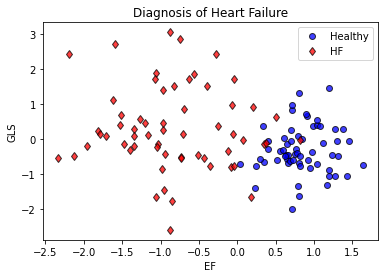

In [26]:
# load, standardise and reshape the training data
df = pd.read_csv('heart_failure_data.csv')
scaler = StandardScaler()
data = df.to_numpy()
X = scaler.fit_transform(data[:,:2])
y = data[:,2].reshape(-1,1)

# convert to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
print('X: ', X.shape)
print('y: ', y.shape)

# Plot data
PlotData(X,y)

### Network architecture

Our simple binary linear classifier network will be in fact **logistic regression**.

To create the network architecture we will need a single **linear layer** $z=\sum_{j=0}^Dw_jx_j$ with $D=2$ input features (EF, GLS) and one output feature (HF):

In [27]:
nn.Linear(2,1)

Linear(in_features=2, out_features=1, bias=True)

Because we are building a logistic regression classifier, we choose a **sigmoid** $\sigma(z)=\frac{1}{1+e^{-z}}$ as an activation function $f(z)$. 

In [28]:
nn.Sigmoid()

Sigmoid()

The loss function will be **binary cross-entropy** 
$$L(\mathbf{y},\mathbf{\hat{p}})=-\sum_{i=1}^N(y_i\log\hat{p_i}+(1-y_i)\log(1-\hat{p_i}))$$
where $\hat{p_i}=\sigma(z)$. The binary cross-entropy loss in Pytorch is 

In [29]:
nn.BCELoss()

BCELoss()

**Task 1.2:** Complete the code to create a linear binary classifier network using the building blocks shown above

In [30]:
# Define network architecture
class ANClassifier(nn.Module):
    def __init__(self):
        super(ANClassifier, self).__init__()
        self.layer = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.sigmoid(x)
        return x

### Training
**Task 1.3:** Fill in the code to create the network instance, loss and optimiser, as well as the 5 steps of training that are performed during each epoch. The code the plot the fitted model is provided for you.

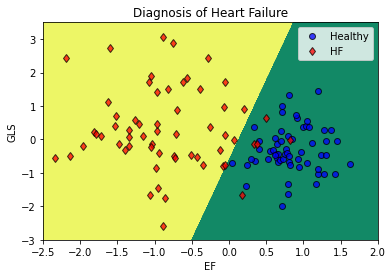

In [31]:
# Create network 
net2 = ANClassifier()

# Loss
loss_function = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)

# Training
epochs = 100
for i in range(epochs):
    
    # 1. Clear gradients 
    optimizer.zero_grad() 
    # 2. Forward pass
    prediction = net2(X) 
    # 3. Compute loss
    loss = loss_function(prediction, y) 
    # 4. Calculate gradients
    loss.backward()       
    # 5. Update network parameters
    optimizer.step() 
    
# Plot classification result

PlotClassification(net2,X,y) 